# Explore runs

Load and explore embeddings from different methods

TODO:
1. test performance

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import polars as pl

plt.style.use("seaborn-v0_8-whitegrid")

import sys
from pathlib import Path

sys.path.append(str(Path().absolute().parent))

import utilities

Models summary

In [2]:
import mlflow

experiment = mlflow.get_experiment_by_name("movie_lens_rating_prediction")
runs_df = mlflow.search_runs(experiment_ids=[experiment.experiment_id])
runs_df = pl.DataFrame(runs_df)

runs_df = runs_df.filter(pl.col('tags.mlflow.runName').str.contains("nn_inner_no_bias_").not_())

start_cols = [
    "tags.mlflow.runName",
    # "params.layer_sizes",
    "params.embedding_dim",
    "params.learning_rate",
    "metrics.epoch",
    "metrics.train_loss_epoch",
    "metrics.val_loss_epoch",
    "metrics.test_loss_epoch",
]
runs_df.select(
    start_cols + [col for col in runs_df.columns if col not in start_cols]
).sort("metrics.val_loss_epoch")

tags.mlflow.runName,params.embedding_dim,params.learning_rate,metrics.epoch,metrics.train_loss_epoch,metrics.val_loss_epoch,metrics.test_loss_epoch,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.train_loss_step,metrics.test_loss_step,metrics.val_loss_step,params.include_bias,params.avg_rating,params.n_users,params.n_movies,tags.mlflow.source.name,tags.mlflow.source.type,tags.mlflow.user
str,str,str,f64,f64,f64,f64,str,str,str,str,"datetime[ns, UTC]","datetime[ns, UTC]",f64,f64,f64,str,str,str,str,str,str,str
"""nn_colab_filter_linear_2025010…","""5""","""0.005""",null,null,null,null,"""b79a2e9dbd424525957ed71ccb7543…","""486488097731553569""","""FAILED""","""/Users/rich/Developer/Github/V…",2025-01-03 22:14:46.718 UTC,2025-01-03 22:14:49.674 UTC,null,null,null,null,"""None""","""157481""","""50""","""/Users/rich/Developer/Github/V…","""LOCAL""","""rich"""
"""nn_inner_bias_20250103_220456""","""5""","""0.005""",0.0,null,null,null,"""38a76fa1422943868f1f66ae1c70fd…","""486488097731553569""","""FAILED""","""/Users/rich/Developer/Github/V…",2025-01-03 22:04:57.776 UTC,2025-01-03 22:05:00.333 UTC,8.796578,null,null,null,"""None""","""157481""","""50""","""/Users/rich/Developer/Github/V…","""LOCAL""","""rich"""
"""nn_colab_filter_linear""","""5""","""0.005""",12.0,0.594095,0.688266,0.694987,"""5c003cf04b744e5792d42292724f21…","""486488097731553569""","""FINISHED""","""/Users/rich/Developer/Github/V…",2025-01-03 21:33:12.731 UTC,2025-01-03 21:37:45.863 UTC,0.598961,0.629046,0.668312,null,null,"""157481""","""50""","""/Users/rich/Developer/Github/V…","""LOCAL""","""rich"""
"""nn_inner_20250208_223340""","""5""","""0.005""",13.0,0.497633,0.745106,0.75453,"""67068637eee64d9e9e469b4a93ddf9…","""486488097731553569""","""FINISHED""","""/Users/rich/Developer/Github/V…",2025-02-08 22:33:41.217 UTC,2025-02-08 22:37:27.876 UTC,0.498578,0.688663,0.694154,null,null,"""157481""","""50""","""/Users/rich/Developer/Github/V…","""LOCAL""","""rich"""
"""nn_inner_bias""","""5""","""0.005""",20.0,0.530948,0.760835,0.769678,"""2443aa58fd5d4e44a5238735d0d80f…","""486488097731553569""","""FINISHED""","""/Users/rich/Developer/Github/V…",2025-01-03 21:47:02.652 UTC,2025-01-03 21:53:13.610 UTC,0.509934,0.721077,0.750463,null,null,"""157481""","""50""","""/Users/rich/Developer/Github/V…","""LOCAL""","""rich"""
"""nn_colab_filter_linear_bias_20…","""5""","""0.005""",40.0,0.679742,0.786938,0.794565,"""fe18b2d579064abb9d41cb04002bbe…","""486488097731553569""","""FINISHED""","""/Users/rich/Developer/Github/V…",2025-01-03 22:15:15.348 UTC,2025-01-03 22:38:35.928 UTC,0.708095,0.73971,0.76419,null,"""None""","""157481""","""50""","""/Users/rich/Developer/Github/V…","""LOCAL""","""rich"""
"""nn_inner_bias_20250103_220711""","""5""","""0.005""",15.0,0.631388,0.794841,0.803507,"""698214c596cf4542a056fe19422272…","""486488097731553569""","""FINISHED""","""/Users/rich/Developer/Github/V…",2025-01-03 22:07:13.399 UTC,2025-01-03 22:12:20.020 UTC,0.641938,0.733008,0.761376,null,"""3.979540382205255""","""157481""","""50""","""/Users/rich/Developer/Github/V…","""LOCAL""","""rich"""
"""nn_inner_bias_20250208_225404""","""5""","""0.005""",14.0,0.655814,0.801583,0.810041,"""557b4c3c128343c08c1112a2c95f3b…","""486488097731553569""","""FINISHED""","""/Users/rich/Developer/Github/V…",2025-02-08 22:54:05.968 UTC,2025-02-08 22:58:16.520 UTC,0.671247,0.74266,0.817706,"""True""","""3.979540382205255""","""157481""","""50""","""/Users/rich/Developer/Github/V…","""LOCAL""","""rich"""
"""nn_inner_bias_20250208_221530""","""5""","""0.005""",15.0,0.6739,0.80381,0.810755,"""80ca35affbb34e9ca65997c0b016a7…","""486488097731553569""","""FINISHED""","""/Users/rich/Developer/Github/V…",2025-02-08 22:15:31.679 UTC,2025-02-08 22:20:51.320 UTC,0.693912,0.711201,0.798488,null,"""3.979540382205255""","""157481""","""50""","""/Users/rich/Developer/Github/V…","""LOCAL""","""rich"""


Plot training logs

epoch,step,dataset,loss,name
u32,i64,str,f64,str
1,434,"""train_loss""",2.035982,"""nn_inner_bias_20250208_225404"""
2,869,"""train_loss""",1.275522,"""nn_inner_bias_20250208_225404"""
3,1304,"""train_loss""",1.072888,"""nn_inner_bias_20250208_225404"""
4,1739,"""train_loss""",0.93226,"""nn_inner_bias_20250208_225404"""
5,2174,"""train_loss""",0.838973,"""nn_inner_bias_20250208_225404"""
…,…,…,…,…
8,3479,"""val_loss""",0.687667,"""nn_colab_filter_linear"""
9,3914,"""val_loss""",0.685636,"""nn_colab_filter_linear"""
10,4349,"""val_loss""",0.684599,"""nn_colab_filter_linear"""


/var/folders/ky/4qby95090jbbq38_mh94x72r0000gn/T/ipykernel_51928/1214080125.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


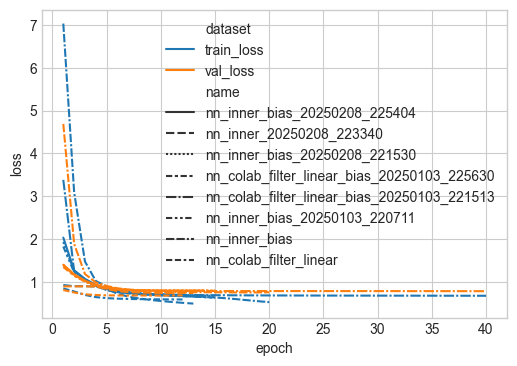

In [3]:
plot_df = utilities.get_training_logs_for_experiment("movie_lens_rating_prediction")
plot_df = plot_df.filter(pl.col('name').str.contains("nn_inner_no_bias_").not_())
display(plot_df)


fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(data=plot_df, x="epoch", y="loss", style="name", hue="dataset", ax=ax)
fig.show()

Dataset losses

/var/folders/ky/4qby95090jbbq38_mh94x72r0000gn/T/ipykernel_51928/1685359539.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


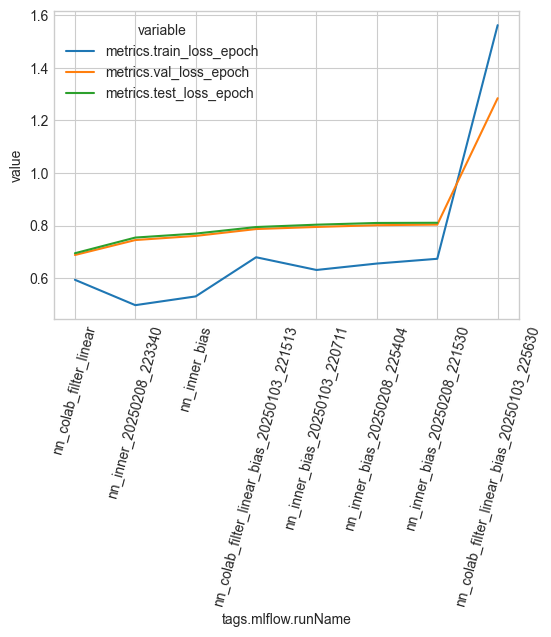

In [4]:
plot_df = runs_df.sort("metrics.val_loss_epoch").unpivot(
    index="tags.mlflow.runName",
    on=[
        "metrics.train_loss_epoch",
        "metrics.val_loss_epoch",
        "metrics.test_loss_epoch",
    ],
)

fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(data=plot_df, x="tags.mlflow.runName", y="value", hue="variable", ax=ax)
ax.tick_params(axis="x", labelrotation=75)
fig.show()